In [20]:
# y = 2X-3
import numpy as np
x = np.array([4,8,3,-2,5])
y = np.array([6,12.5,3.5,-7.5,6])

def h_w(x,w): # w = [w0,w1]
  y = w[0] + w[1]*x
  return y

epochs = 300
alpha = .01
w = [0,0]

for i in range(epochs):
  Gw0 = np.sum(h_w(x,w)-y)/5
  Gw1 = np.sum((h_w(x,w)-y)*x)/5
  w[0] = w[0] - alpha*Gw0
  w[0] -= alpha*Gw0
  w[1] -= alpha*Gw1
  #print(Gw0)
print(w)


[np.float64(-2.7900373573289627), np.float64(1.9452701850789245)]


In [31]:
# y = X**2 - 2X

def generate_data(n,noise):
  np.random.seed(0)
  x = np.random.uniform(-10,10,n)
  y = x**2 - 2*x + np.random.randn(n)*noise
  return x,y

from sklearn.model_selection import train_test_split
x,y = generate_data(100,10)
x_trian,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=20)


print(x_trian[:,np.newaxis].shape)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_trian[:,np.newaxis],y_train)

y_pred = model.predict(x_test[:,np.newaxis])
#print(y_pred)
#print(y_test)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))


(80, 1)
765.9130023605582


In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
x_train_poly = poly_features.fit_transform(x_trian[:,np.newaxis])
#print(x_train_poly.shape)
x_test_poly = poly_features.fit_transform(x_test[:,np.newaxis])

model = LinearRegression()
model.fit(x_train_poly,y_train)
y_pred = model.predict(x_test_poly)
print(mean_squared_error(y_test,y_pred))

75.44180652902875


In [38]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads_new.csv to Social_Network_Ads_new.csv


In [39]:
import pandas as pd
df = pd.read_csv('Social_Network_Ads_new.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [52]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(y_train)

[1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]


In [53]:
print(y_train.shape)
ind1 = np.where(y_train==1)
print(ind1)

(320,)
(array([  0,   4,   5,   7,   8,  11,  15,  17,  18,  19,  21,  23,  24,
        25,  32,  33,  34,  36,  39,  41,  43,  46,  47,  48,  49,  51,
        53,  56,  59,  65,  66,  67,  68,  72,  74,  76,  79,  83,  87,
        88,  91,  93,  94,  95,  98,  99, 102, 103, 105, 108, 109, 111,
       112, 113, 119, 122, 123, 124, 125, 126, 128, 129, 131, 139, 140,
       143, 146, 150, 152, 153, 155, 160, 164, 165, 170, 172, 176, 181,
       182, 183, 190, 191, 192, 193, 194, 196, 202, 209, 210, 212, 214,
       217, 221, 227, 233, 235, 236, 243, 244, 249, 254, 256, 258, 262,
       266, 268, 274, 275, 281, 283, 284, 290, 292, 295, 298, 300, 307,
       308, 309, 310, 315]),)


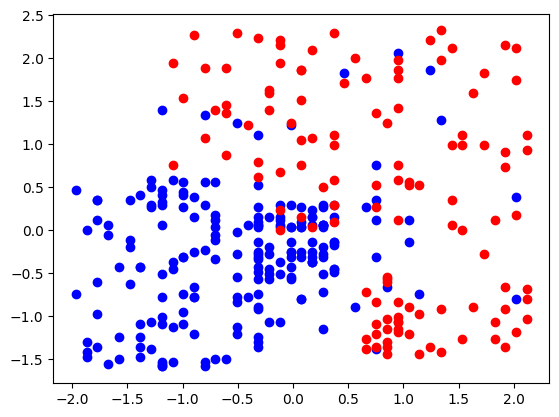

In [56]:
import matplotlib.pyplot as plt

ind0 = np.where(y_train==0)
ind1 = np.where(y_train==1)

x0 = x_train[ind0,0]
y0 = x_train[ind0,1]

x1 = x_train[ind1,0]
y1 = x_train[ind1,1]

plt.scatter(x0,y0,color='blue')
plt.scatter(x1,y1,color='red')
plt.show()

In [57]:
LC = LinearRegression()
LC.fit(x_train,y_train)
y_pred = LC.predict(x_test)
print(y_pred)
print(y_test)

[ 0.23169493  0.29518625  0.31451866  0.20067172  0.21757112 -0.10573962
 -0.02164229  0.6079656  -0.15244574  0.50088634  0.08433466  0.05585865
  0.28870405  0.42576131 -0.03090008  0.3997754   0.37401789 -0.06064969
  1.04523748  0.10898987  0.20593741  0.89255442  0.37667929  0.74131625
 -0.17820325  0.93266413  0.17995151  0.17867791  0.31584936  0.27956045
  0.00272743  0.38177369  0.82552778  0.28094825 -0.03599449 -0.21449216
  0.00145383  0.1645541   0.05203785  0.52548445  0.1579577   0.38055719
  0.14244609  0.10123407  0.66497472  0.04162065  0.38565159  0.81250628
 -0.09283231  0.71937954  1.06595769  0.09475186  0.24471643  0.44376302
  0.98585245  0.406486    0.19031161  0.10106277  0.49446123 -0.20922647
  0.01586313  0.83334068 -0.09555081  0.43346002 -0.2894459   0.99233465
  0.08422047  0.04162065  0.33529597  0.47623113  0.52774616  0.32227447
 -0.0683484   0.36770698  0.1618356  -0.09815511  0.51113225  0.38570869
  0.62121549  0.74907205]
[0 0 0 0 0 0 0 1 0 0 0 0 

In [58]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[57  1]
 [ 5 17]]


In [60]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.925
